In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vehichle-sales/MVA_Vehicle_Sales.csv


In [2]:
# Load the dataset
vehicle_sales = pd.read_csv('/kaggle/input/vehichle-sales/MVA_Vehicle_Sales.csv')
vehicle_sales.head()


,Year,Month,New,Used,Total Sales New,Total Sales Used
0,2002,JAN,31106,49927,755015820,386481929
1,2002,FEB,27520,50982,664454223,361353242
2,2002,MAR,34225,58794,805666244,419385387
3,2002,APR,36452,59817,846368297,433061150
4,2002,MAY,37359,60577,855005784,442569410


In [3]:
vehicle_sales.info()
vehicle_sales.describe()
vehicle_sales.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              273 non-null    int64 
 1   Month             273 non-null    object
 2   New               273 non-null    int64 
 3   Used              273 non-null    int64 
 4   Total Sales New   273 non-null    int64 
 5   Total Sales Used  273 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.9+ KB


Year                0
Month               0
New                 0
Used                0
Total Sales New     0
Total Sales Used    0
dtype: int64

In [4]:
print(vehicle_sales.columns)


Index(['Year ', 'Month ', 'New', 'Used', 'Total Sales New',
       'Total Sales Used'],
      dtype='object')


In [5]:
# Remove leading/trailing spaces from column names
vehicle_sales.columns = vehicle_sales.columns.str.strip()


In [6]:
# Combine Year and Month into a Date column with explicit format
vehicle_sales['Date'] = pd.to_datetime(
    vehicle_sales['Year'].astype(str) + '-' + vehicle_sales['Month'], 
    format='%Y-%b'
)


In [7]:
# Sort data by Date
vehicle_sales = vehicle_sales.sort_values('Date')


In [8]:
# View the first few rows of the updated dataset
vehicle_sales.head()


,Year,Month,New,Used,Total Sales New,Total Sales Used,Date
0,2002,JAN,31106,49927,755015820,386481929,2002-01-01
1,2002,FEB,27520,50982,664454223,361353242,2002-02-01
2,2002,MAR,34225,58794,805666244,419385387,2002-03-01
3,2002,APR,36452,59817,846368297,433061150,2002-04-01
4,2002,MAY,37359,60577,855005784,442569410,2002-05-01


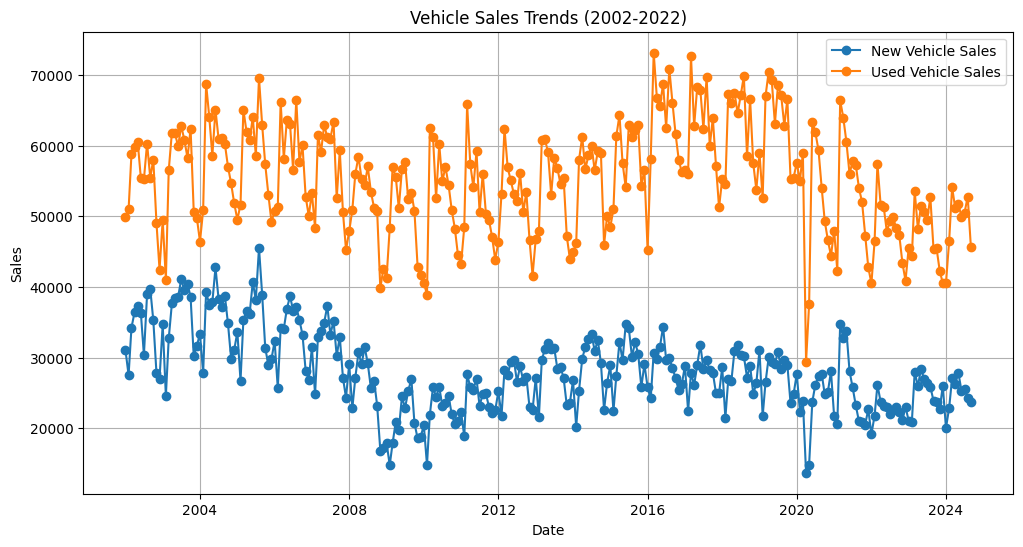

In [9]:
import matplotlib.pyplot as plt

# Plot new and used vehicle sales over time
plt.figure(figsize=(12, 6))
plt.plot(vehicle_sales['Date'], vehicle_sales['New'], label='New Vehicle Sales', marker='o')
plt.plot(vehicle_sales['Date'], vehicle_sales['Used'], label='Used Vehicle Sales', marker='o')

plt.title('Vehicle Sales Trends (2002-2022)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid()
plt.show()


In [10]:
# Monthly average sales
monthly_trends = vehicle_sales.groupby('Month')[['New', 'Used']].mean()

# Yearly total sales
yearly_trends = vehicle_sales.groupby('Year')[['New', 'Used']].sum()


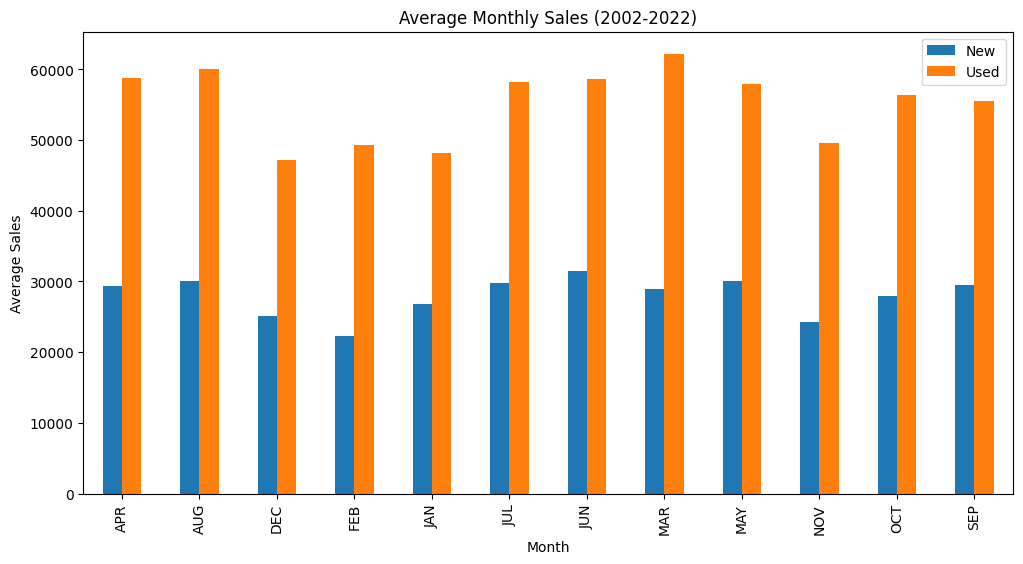

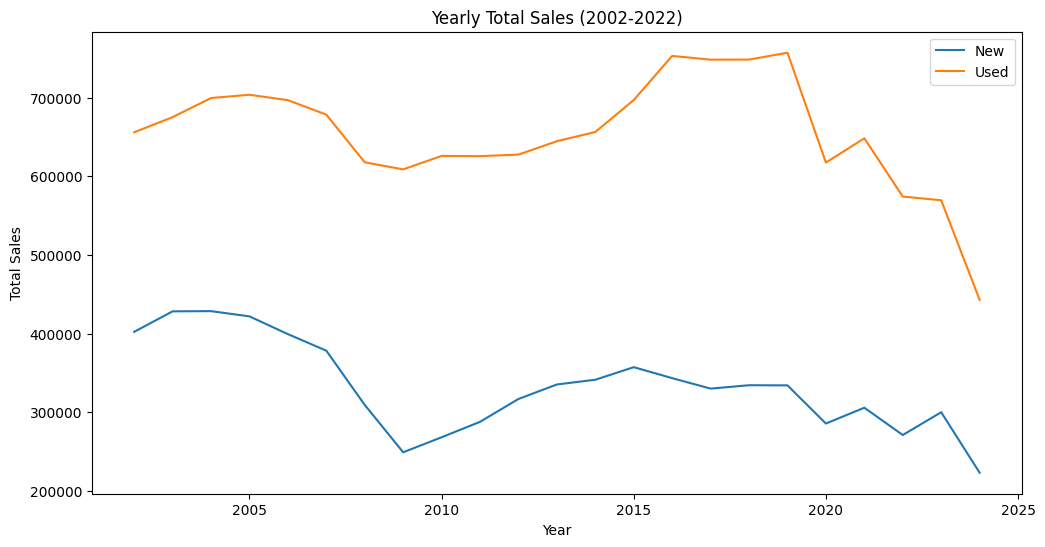

In [11]:
# Bar plot for monthly trends
monthly_trends.plot(kind='bar', figsize=(12, 6), title='Average Monthly Sales (2002-2022)')
plt.ylabel('Average Sales')
plt.show()

# Line plot for yearly trends
yearly_trends.plot(kind='line', figsize=(12, 6), title='Yearly Total Sales (2002-2022)')
plt.ylabel('Total Sales')
plt.show()


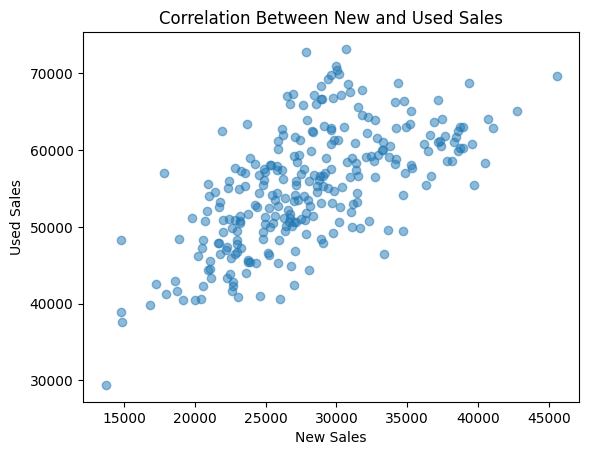

In [12]:
plt.scatter(vehicle_sales['New'], vehicle_sales['Used'], alpha=0.5)
plt.title('Correlation Between New and Used Sales')
plt.xlabel('New Sales')
plt.ylabel('Used Sales')
plt.show()


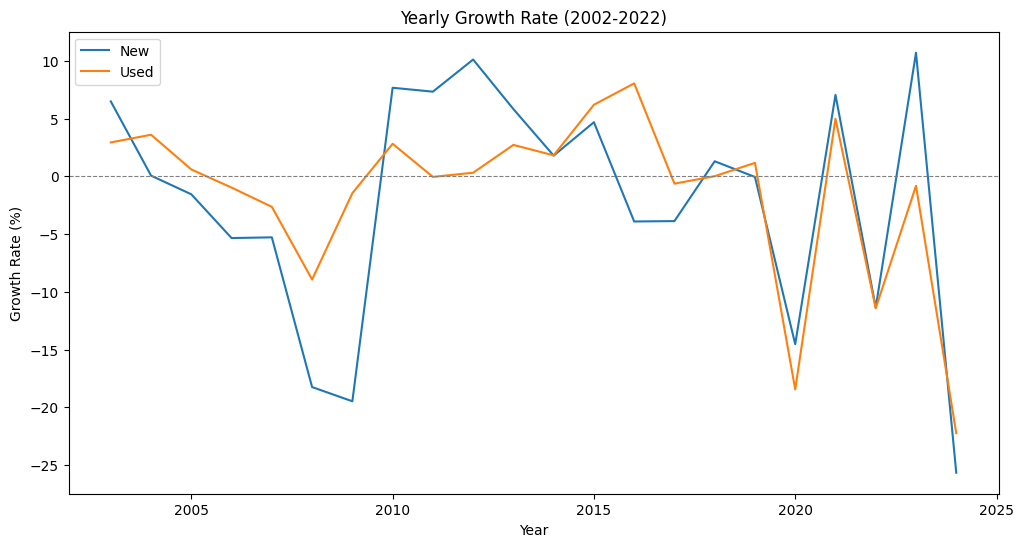

In [13]:
# Calculate yearly sales
yearly_sales = vehicle_sales.groupby('Year')[['New', 'Used']].sum()

# Calculate percentage growth
yearly_growth = yearly_sales.pct_change() * 100

# Plot yearly growth
yearly_growth.plot(kind='line', figsize=(12, 6), title='Yearly Growth Rate (2002-2022)', color=['#1f77b4', '#ff7f0e'])
plt.xlabel('Year')
plt.ylabel('Growth Rate (%)')
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.show()


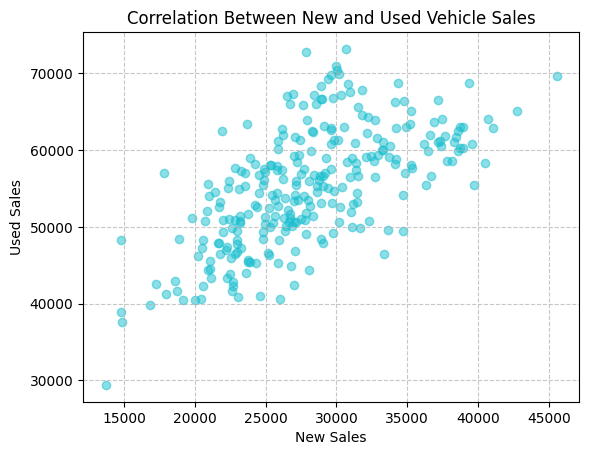

Correlation Coefficient Between New and Used Sales:
            New      Used
New   1.000000  0.637569
Used  0.637569  1.000000


In [14]:
# Scatter plot for correlation
plt.scatter(vehicle_sales['New'], vehicle_sales['Used'], alpha=0.5, color='#17becf')
plt.title('Correlation Between New and Used Vehicle Sales')
plt.xlabel('New Sales')
plt.ylabel('Used Sales')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Calculate correlation coefficient
correlation = vehicle_sales[['New', 'Used']].corr()
print("Correlation Coefficient Between New and Used Sales:\n", correlation)


In [15]:
yearly_sales.index = pd.date_range(start=f"{yearly_sales.index.min()}-01-01", 
                                   periods=len(yearly_sales), freq='Y')


In [16]:
yearly_sales.index = pd.date_range(
    start=f"{yearly_sales.index.min()}-01-01",
    periods=len(yearly_sales),
    freq='Y'
)


In [17]:
print(yearly_sales['New'].describe())
print(yearly_sales['New'].isnull().sum())


count        23.000000
mean     332547.869565
std       57341.638571
min      222903.000000
25%      293773.000000
50%      334041.000000
75%      367696.000000
max      428508.000000
Name: New, dtype: float64
0


In [18]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing


In [19]:
!pip install statsmodels


In [20]:
import pandas as pd

# Load the dataset
vehicle_sales = pd.read_csv('/kaggle/input/vehichle-sales/MVA_Vehicle_Sales.csv')

# Remove any leading or trailing spaces in column names
vehicle_sales.columns = vehicle_sales.columns.str.strip()

# Preview the data
print(vehicle_sales.head())


   Year Month    New   Used  Total Sales New  Total Sales Used
0  2002   JAN  31106  49927        755015820         386481929
1  2002   FEB  27520  50982        664454223         361353242
2  2002   MAR  34225  58794        805666244         419385387
3  2002   APR  36452  59817        846368297         433061150
4  2002   MAY  37359  60577        855005784         442569410


In [21]:
# Group by 'Year' and sum the sales
yearly_sales = vehicle_sales.groupby('Year').sum()

# Preview the aggregated data
print(yearly_sales.head())


                                     Month     New    Used  Total Sales New  \
Year                                                                          
2002  JANFEBMARAPRMAYJUNJULAUGSEPOCTNOVDEC  402164  656089       9572554876   
2003  JANFEBMARAPRMAYJUNJULAUGSEPOCTNOVDEC  428252  675358      10623148339   
2004  JANFEBMARAPRMAYJUNJULAUGSEPOCTNOVDEC  428508  699677      10972956024   
2005  JANFEBMARAPRMAYJUNJULAUGSEPOCTNOVDEC  421834  703835      11006733922   
2006  JANFEBMARAPRMAYJUNJULAUGSEPOCTNOVDEC  399282  696968      10411657206   

      Total Sales Used  
Year                    
2002        4940209772  
2003        5166071497  
2004        5385548947  
2005        5639803515  
2006        5865687318  


In [22]:
# Convert the 'Year' column to a datetime index if not already done
yearly_sales.index = pd.date_range(start=f"{yearly_sales.index.min()}-01-01", 
                                   periods=len(yearly_sales), freq='Y')

print(yearly_sales.index)


DatetimeIndex(['2002-12-31', '2003-12-31', '2004-12-31', '2005-12-31',
               '2006-12-31', '2007-12-31', '2008-12-31', '2009-12-31',
               '2010-12-31', '2011-12-31', '2012-12-31', '2013-12-31',
               '2014-12-31', '2015-12-31', '2016-12-31', '2017-12-31',
               '2018-12-31', '2019-12-31', '2020-12-31', '2021-12-31',
               '2022-12-31', '2023-12-31', '2024-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


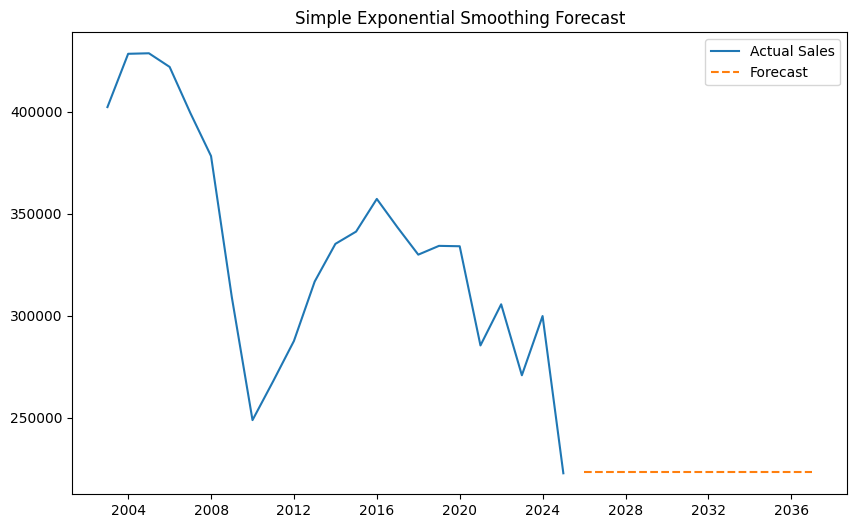

In [23]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
import matplotlib.pyplot as plt

# Fit the model to the "New" sales column
model_new = SimpleExpSmoothing(yearly_sales['New'], initialization_method='estimated').fit()

# Forecast the next 12 periods
forecast_new = model_new.forecast(12)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales['New'], label='Actual Sales')
plt.plot(pd.date_range(start=yearly_sales.index[-1], periods=13, freq='Y')[1:], 
         forecast_new, linestyle='--', label='Forecast')
plt.legend()
plt.title('Simple Exponential Smoothing Forecast')
plt.show()



In [24]:
yearly_sales['New'] = np.log1p(yearly_sales['New'])


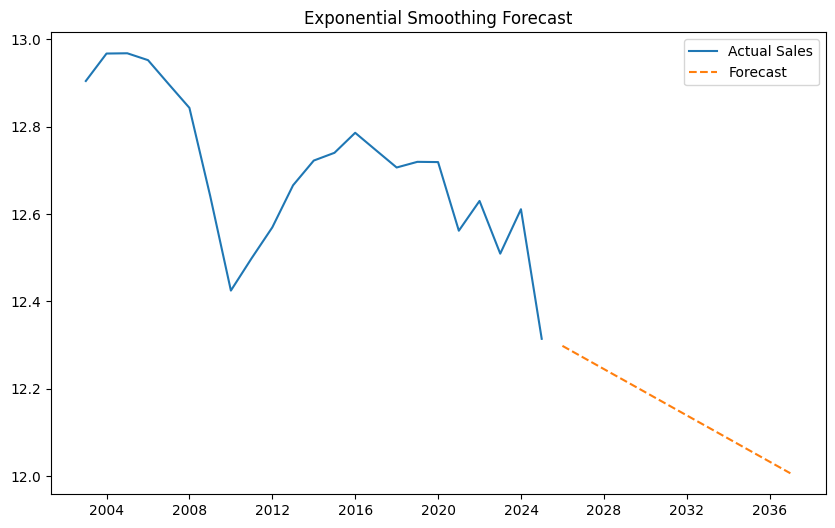

In [25]:
yearly_sales.index = pd.date_range(start=f"{yearly_sales.index.min()}-01-01", periods=len(yearly_sales), freq='Y')

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fitting the model
model_holt = ExponentialSmoothing(yearly_sales['New'], trend='add', seasonal=None, initialization_method='estimated')
fit_holt = model_holt.fit()

# Forecasting
forecast_holt = fit_holt.forecast(12)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales['New'], label='Actual Sales')
plt.plot(pd.date_range(start=yearly_sales.index[-1], periods=13, freq='Y')[1:], forecast_holt, linestyle='--', label='Forecast')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.show()


In [26]:
from sklearn.metrics import mean_absolute_error

# Use the last 12 actual values for comparison
actual = yearly_sales['New'][-12:]
forecast = forecast_holt[:12]

mae = mean_absolute_error(actual, forecast)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.49471875122545717


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Calculate metrics
mse = mean_squared_error(actual, forecast)
mape = mean_absolute_percentage_error(actual, forecast)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")


Mean Squared Error (MSE): 0.25044153391059804
Mean Absolute Percentage Error (MAPE): 0.039077142967148135


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


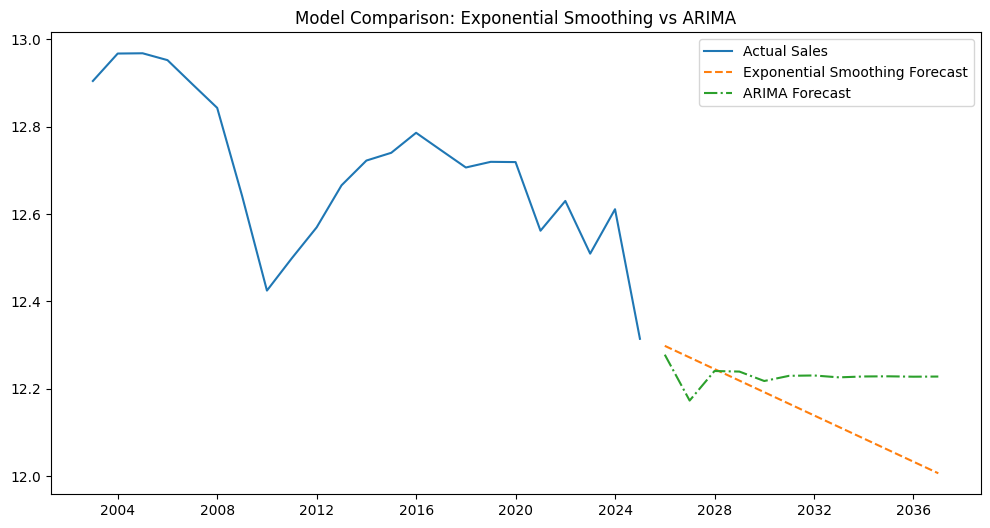

In [28]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model
arima_model = ARIMA(yearly_sales['New'], order=(2, 1, 2))  # You can adjust the order
arima_fit = arima_model.fit()

# Forecast
forecast_arima = arima_fit.forecast(steps=12)

# Plot comparison
plt.figure(figsize=(12, 6))
plt.plot(yearly_sales.index, yearly_sales['New'], label='Actual Sales')
plt.plot(pd.date_range(start=yearly_sales.index[-1], periods=13, freq='Y')[1:], forecast_holt, linestyle='--', label='Exponential Smoothing Forecast')
plt.plot(pd.date_range(start=yearly_sales.index[-1], periods=13, freq='Y')[1:], forecast_arima, linestyle='-.', label='ARIMA Forecast')
plt.legend()
plt.title('Model Comparison: Exponential Smoothing vs ARIMA')
plt.show()


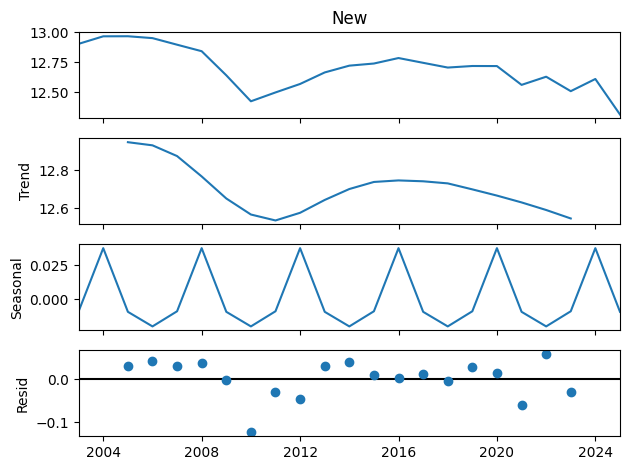

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Adjust the period to 4 (quarterly)
decomposition = seasonal_decompose(yearly_sales['New'], model='additive', period=4)
decomposition.plot()
plt.show()


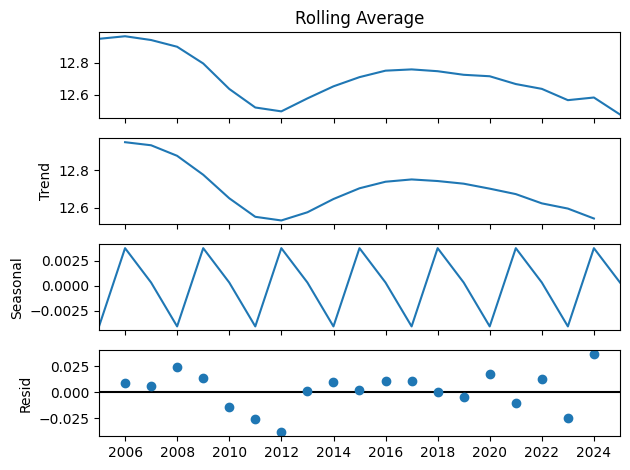

In [30]:
# Create multi-year rolling averages (e.g., 3 years)
yearly_sales['Rolling Average'] = yearly_sales['New'].rolling(window=3).mean()

# Seasonal decomposition on rolling average
decomposition = seasonal_decompose(yearly_sales['Rolling Average'].dropna(), model='additive', period=3)
decomposition.plot()
plt.show()


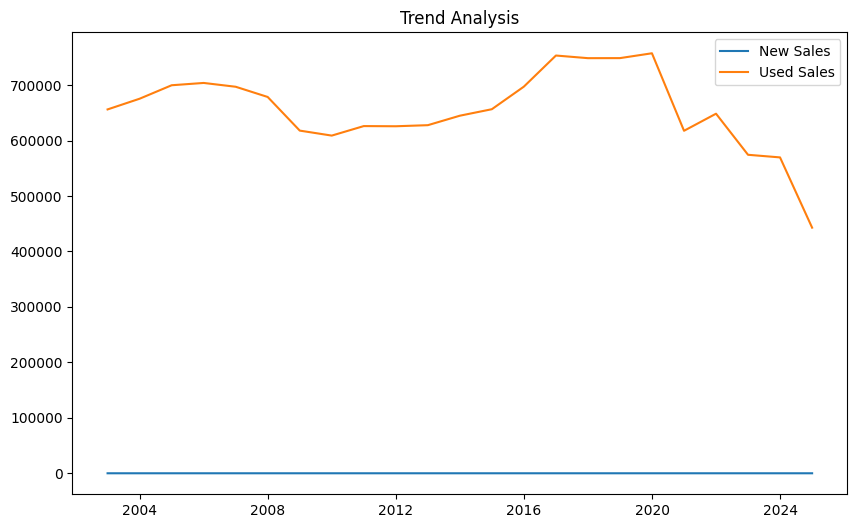

In [31]:
# Plot simple trends
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales['New'], label='New Sales')
plt.plot(yearly_sales.index, yearly_sales['Used'], label='Used Sales')
plt.title('Trend Analysis')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


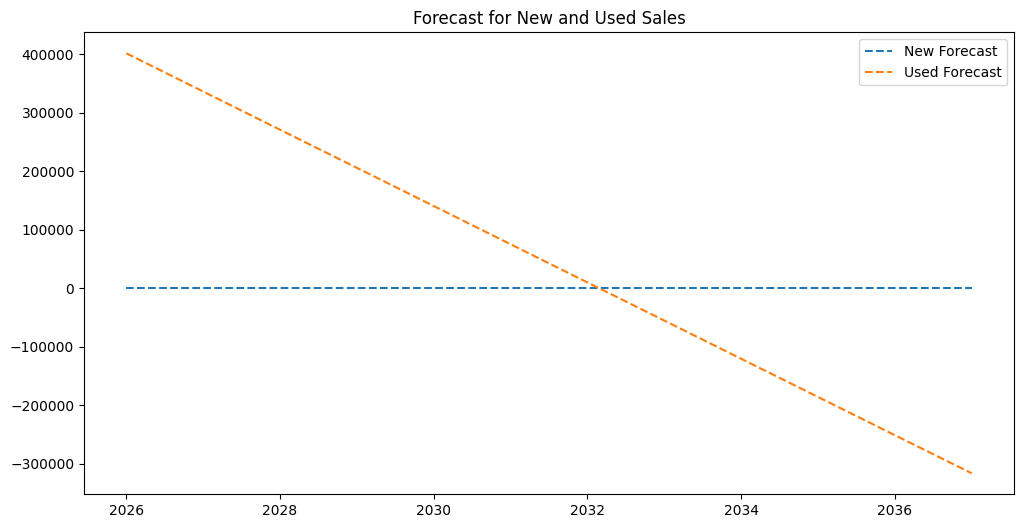

In [32]:
columns_to_forecast = ['New', 'Used']
forecasts = {}

for col in columns_to_forecast:
    model = ExponentialSmoothing(yearly_sales[col], trend='add', seasonal=None, initialization_method='estimated')
    fit = model.fit()
    forecasts[col] = fit.forecast(12)

# Plot forecasts
plt.figure(figsize=(12, 6))
for col in columns_to_forecast:
    plt.plot(pd.date_range(start=yearly_sales.index[-1], periods=13, freq='Y')[1:], forecasts[col], linestyle='--', label=f'{col} Forecast')
plt.legend()
plt.title('Forecast for New and Used Sales')
plt.show()


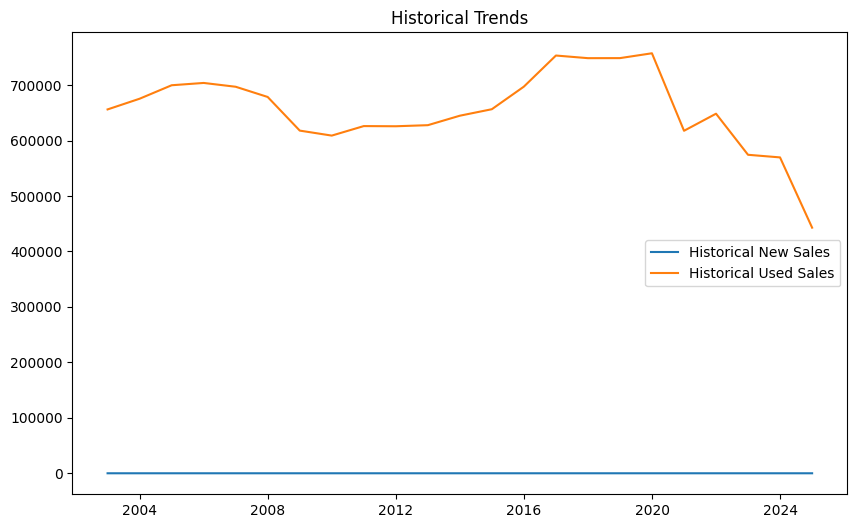

In [33]:
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales.index, yearly_sales['New'], label='Historical New Sales')
plt.plot(yearly_sales.index, yearly_sales['Used'], label='Historical Used Sales')
plt.title('Historical Trends')
plt.legend()
plt.show()


In [34]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Apply Holt-Winters Exponential Smoothing
model_new = ExponentialSmoothing(
    yearly_sales['New'], trend='add', seasonal=None, initialization_method='estimated'
).fit()
forecast_new = model_new.forecast(12)


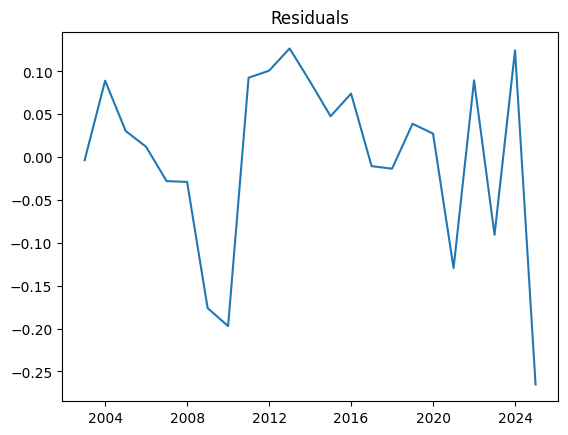

In [35]:
residuals = yearly_sales['New'] - model_new.fittedvalues
plt.plot(residuals)
plt.title('Residuals')
plt.show()


In [36]:
import pandas as pd

# Manually define the external data
external_data = {
    "Date": [
        "2002-01-01", "2002-02-01", "2002-03-01", "2002-04-01",
        "2002-05-01", "2002-06-01", "2002-07-01", "2002-08-01",
        "2002-09-01", "2002-10-01", "2002-11-01", "2002-12-01"
    ],
    "GDP_Growth": [3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6],
    "Inflation_Rate": [2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2]
}

# Convert the dictionary to a DataFrame
external_data_df = pd.DataFrame(external_data)

# Convert the 'Date' column to datetime
external_data_df['Date'] = pd.to_datetime(external_data_df['Date'])

# Ensure your vehicle sales data also has a 'Date' column for merging
vehicle_sales['Date'] = pd.date_range(start="2002-01-01", periods=len(vehicle_sales), freq="M")

# Merge vehicle sales data with external data
enriched_data = pd.merge(vehicle_sales, external_data_df, on="Date", how="left")

# Display the enriched data
print(enriched_data.head())


   Year Month    New   Used  Total Sales New  Total Sales Used       Date  \
0  2002   JAN  31106  49927        755015820         386481929 2002-01-31   
1  2002   FEB  27520  50982        664454223         361353242 2002-02-28   
2  2002   MAR  34225  58794        805666244         419385387 2002-03-31   
3  2002   APR  36452  59817        846368297         433061150 2002-04-30   
4  2002   MAY  37359  60577        855005784         442569410 2002-05-31   

   GDP_Growth  Inflation_Rate  
0         NaN             NaN  
1         NaN             NaN  
2         NaN             NaN  
3         NaN             NaN  
4         NaN             NaN  


In [37]:
import pandas as pd
import numpy as np

# Create a date range for the external data (monthly from 2002 to 2022)
dates = pd.date_range(start="2002-01-01", end="2022-12-01", freq="MS")

# Generate synthetic data for GDP Growth and Inflation Rate
np.random.seed(42)  # For reproducible results
gdp_growth = np.random.uniform(2.5, 5.0, len(dates))  # GDP Growth (random values between 2.5% and 5.0%)
inflation_rate = np.random.uniform(1.5, 4.0, len(dates))  # Inflation Rate (random values between 1.5% and 4.0%)

# Create the external data DataFrame
external_data = pd.DataFrame({
    "Date": dates,
    "GDP_Growth": gdp_growth,
    "Inflation_Rate": inflation_rate
})

# Ensure your vehicle sales data also has a 'Date' column for merging
vehicle_sales['Date'] = pd.date_range(start="2002-01-01", periods=len(vehicle_sales), freq="M")

# Merge vehicle sales data with external data
enriched_data = pd.merge(vehicle_sales, external_data, on="Date", how="left")

# Display the enriched data
print(enriched_data.head())



   Year Month    New   Used  Total Sales New  Total Sales Used       Date  \
0  2002   JAN  31106  49927        755015820         386481929 2002-01-31   
1  2002   FEB  27520  50982        664454223         361353242 2002-02-28   
2  2002   MAR  34225  58794        805666244         419385387 2002-03-31   
3  2002   APR  36452  59817        846368297         433061150 2002-04-30   
4  2002   MAY  37359  60577        855005784         442569410 2002-05-31   

   GDP_Growth  Inflation_Rate  
0         NaN             NaN  
1         NaN             NaN  
2         NaN             NaN  
3         NaN             NaN  
4         NaN             NaN  


In [38]:
vehicle_sales['Date'] = pd.to_datetime(vehicle_sales['Date'])
external_data['Date'] = pd.to_datetime(external_data['Date'])


In [39]:
# Ensure external_data is a DataFrame
if isinstance(external_data, dict):
    external_data = pd.DataFrame(external_data)

# Ensure 'Date' is not the index
vehicle_sales = vehicle_sales.reset_index(drop=True)
external_data = external_data.reset_index(drop=True)

# Display the 'Date' columns
print(vehicle_sales['Date'].head())  # Access the 'Date' column correctly
print(external_data['Date'].head())  # Access the 'Date' column correctly


0   2002-01-31
1   2002-02-28
2   2002-03-31
3   2002-04-30
4   2002-05-31
Name: Date, dtype: datetime64[ns]
0   2002-01-01
1   2002-02-01
2   2002-03-01
3   2002-04-01
4   2002-05-01
Name: Date, dtype: datetime64[ns]


In [40]:
# Merge the vehicle_sales and external_data DataFrames on the 'Date' column
enriched_data = pd.merge(vehicle_sales, external_data, on='Date', how='left')

# Display the first few rows of the merged DataFrame to confirm the merge
print(enriched_data.head())

# Optionally, check for missing values in the merged columns
print(enriched_data.isnull().sum())


   Year Month    New   Used  Total Sales New  Total Sales Used       Date  \
0  2002   JAN  31106  49927        755015820         386481929 2002-01-31   
1  2002   FEB  27520  50982        664454223         361353242 2002-02-28   
2  2002   MAR  34225  58794        805666244         419385387 2002-03-31   
3  2002   APR  36452  59817        846368297         433061150 2002-04-30   
4  2002   MAY  37359  60577        855005784         442569410 2002-05-31   

   GDP_Growth  Inflation_Rate  
0         NaN             NaN  
1         NaN             NaN  
2         NaN             NaN  
3         NaN             NaN  
4         NaN             NaN  
Year                  0
Month                 0
New                   0
Used                  0
Total Sales New       0
Total Sales Used      0
Date                  0
GDP_Growth          273
Inflation_Rate      273
dtype: int64


In [41]:
# Fill missing values in GDP_Growth and Inflation_Rate with a placeholder or method
enriched_data['GDP_Growth'].fillna(0, inplace=True)
enriched_data['Inflation_Rate'].fillna(0, inplace=True)

# Check the updated DataFrame
print(enriched_data.head())


   Year Month    New   Used  Total Sales New  Total Sales Used       Date  \
0  2002   JAN  31106  49927        755015820         386481929 2002-01-31   
1  2002   FEB  27520  50982        664454223         361353242 2002-02-28   
2  2002   MAR  34225  58794        805666244         419385387 2002-03-31   
3  2002   APR  36452  59817        846368297         433061150 2002-04-30   
4  2002   MAY  37359  60577        855005784         442569410 2002-05-31   

   GDP_Growth  Inflation_Rate  
0         0.0             0.0  
1         0.0             0.0  
2         0.0             0.0  
3         0.0             0.0  
4         0.0             0.0  


In [42]:
correlation_matrix = enriched_data[['New', 'Used', 'GDP_Growth', 'Inflation_Rate']].corr()
print(correlation_matrix)


                     New      Used  GDP_Growth  Inflation_Rate
New             1.000000  0.637569         NaN             NaN
Used            0.637569  1.000000         NaN             NaN
GDP_Growth           NaN       NaN         NaN             NaN
Inflation_Rate       NaN       NaN         NaN             NaN


In [43]:
import numpy as np

# Replace with random dummy data for testing
enriched_data['GDP_Growth'] = np.random.uniform(-2, 2, len(enriched_data))
enriched_data['Inflation_Rate'] = np.random.uniform(0, 10, len(enriched_data))


In [44]:
correlation_matrix = enriched_data[['New', 'Used', 'GDP_Growth', 'Inflation_Rate']].corr()
print(correlation_matrix)


                     New      Used  GDP_Growth  Inflation_Rate
New             1.000000  0.637569    0.174153        0.024662
Used            0.637569  1.000000    0.086937       -0.037320
GDP_Growth      0.174153  0.086937    1.000000        0.073599
Inflation_Rate  0.024662 -0.037320    0.073599        1.000000


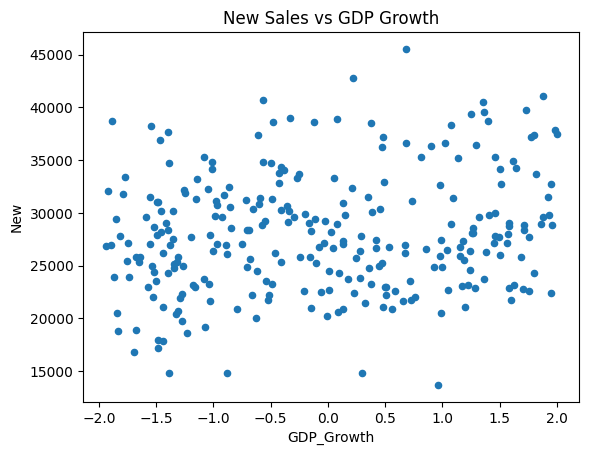

In [45]:
enriched_data.plot(x='GDP_Growth', y='New', kind='scatter', title='New Sales vs GDP Growth')
plt.show()


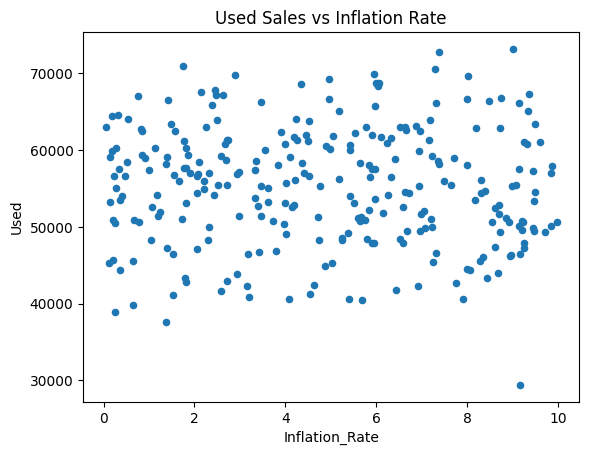

In [46]:
enriched_data.plot(x='Inflation_Rate', y='Used', kind='scatter', title='Used Sales vs Inflation Rate')
plt.show()


In [47]:
enriched_data['Sales_Growth'] = enriched_data['Total Sales New'].pct_change().fillna(0)
print(enriched_data[['Date', 'Sales_Growth']].head())


        Date  Sales_Growth
0 2002-01-31      0.000000
1 2002-02-28     -0.119947
2 2002-03-31      0.212523
3 2002-04-30      0.050520
4 2002-05-31      0.010205


In [48]:
features = enriched_data[['GDP_Growth', 'Inflation_Rate']]
target = enriched_data['New']  # or another sales column


In [49]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [50]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [51]:
from sklearn.metrics import mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 4012.8311970038662
R-squared: 0.026409919827929618


In [52]:
# Example with Random Forest
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
importances = rf_model.feature_importances_
for feature, importance in zip(features.columns, importances):
    print(f"{feature}: {importance}")


GDP_Growth: 0.5367051939943754
Inflation_Rate: 0.4632948060056246


In [53]:
# Example with new external data
new_data = pd.DataFrame({
    'GDP_Growth': [2.1, 1.9],  # Replace with actual future values
    'Inflation_Rate': [3.5, 3.8]
})

future_predictions = model.predict(new_data)
print(future_predictions)


[29832.59733259 29684.4888243 ]


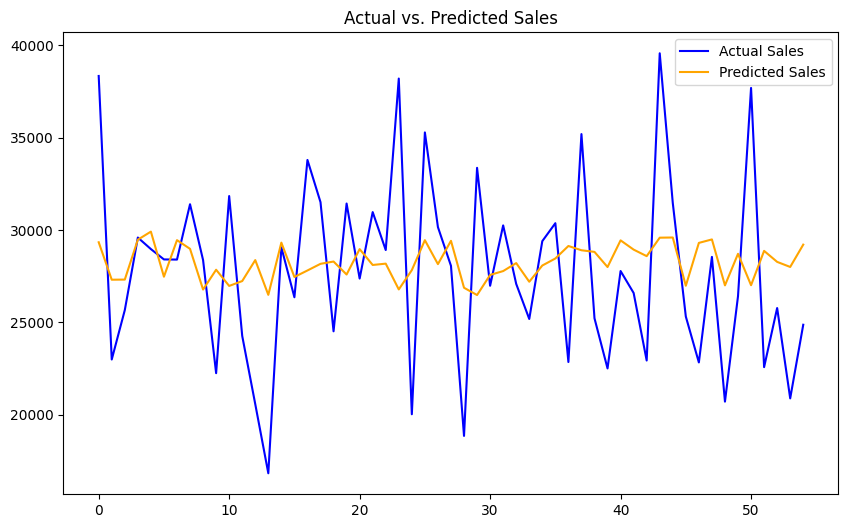

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Sales', color='blue')
plt.plot(y_pred, label='Predicted Sales', color='orange')
plt.title('Actual vs. Predicted Sales')
plt.legend()
plt.show()


In [55]:
enriched_data['GDP_Inflation_Interaction'] = enriched_data['GDP_Growth'] * enriched_data['Inflation_Rate']


In [56]:
enriched_data['Lagged_Sales'] = enriched_data['New'].shift(1).fillna(0)


In [57]:
enriched_data['Rolling_Mean_Sales'] = enriched_data['New'].rolling(window=3).mean().fillna(0)


In [58]:
from xgboost import XGBRegressor

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb_model.fit(features, target)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [59]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_model.fit(features, target)


SVR()

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions
xgb_predictions = xgb_model.predict(features)

# Metrics
mae = mean_absolute_error(target, xgb_predictions)
rmse = mean_squared_error(target, xgb_predictions, squared=False)
r2 = r2_score(target, xgb_predictions)

print(f"XGBoost Model Performance: MAE={mae}, RMSE={rmse}, R²={r2}")


XGBoost Model Performance: MAE=2961.5720867673995, RMSE=3781.1306872221703, R²=0.551775205306273


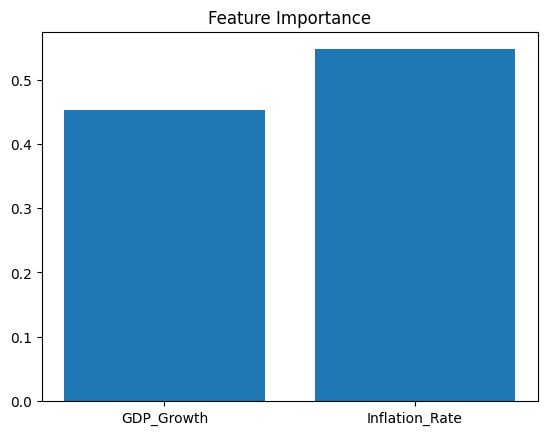

In [61]:
import matplotlib.pyplot as plt

# Feature importance for XGBoost
importance = xgb_model.feature_importances_
plt.bar(features.columns, importance)
plt.title("Feature Importance")
plt.show()


In [62]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1,
                    subplot_titles=("New Vehicle Sales", "Used Vehicle Sales"))

# Add traces
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['New'], mode='lines', name='New Sales'), row=1, col=1)
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['Used'], mode='lines', name='Used Sales'), row=2, col=1)

# Update layout
fig.update_layout(
    title="Interactive Sales Dashboard",
    xaxis_title="Date",
    yaxis_title="Sales",
    height=600
)

fig.show()


In [63]:
from ipywidgets import interact
import matplotlib.pyplot as plt

# Function to plot sales based on a dropdown
def plot_sales(sales_type):
    plt.figure(figsize=(10, 5))
    plt.plot(enriched_data['Date'], enriched_data[sales_type], label=sales_type)
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title(f'{sales_type} Over Time')
    plt.legend()
    plt.show()

# Create dropdown interactivity
interact(plot_sales, sales_type=['New', 'Used'])


interactive(children=(Dropdown(description='sales_type', options=('New', 'Used'), value='New'), Output()), _do…

<function __main__.plot_sales(sales_type)>

In [64]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create a subplot layout
fig = make_subplots(
    rows=3, cols=2, 
    subplot_titles=("New Sales", "Used Sales", "Total Sales", "GDP Growth", "Inflation Rate", "Custom Metric"),
    specs=[[{"type": "scatter"}, {"type": "scatter"}],
           [{"type": "scatter"}, {"type": "scatter"}],
           [{"type": "scatter"}, {"type": "scatter"}]]
)

# Add New Sales data
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['New'], mode='lines', name='New Sales'), row=1, col=1)

# Add Used Sales data
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['Used'], mode='lines', name='Used Sales'), row=1, col=2)

# Add Total Sales
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['Total Sales New'], mode='lines', name='Total Sales New'), row=2, col=1)

# Add GDP Growth
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['GDP_Growth'], mode='lines', name='GDP Growth'), row=2, col=2)

# Add Inflation Rate
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['Inflation_Rate'], mode='lines', name='Inflation Rate'), row=3, col=1)

# Add Custom Metric (Optional)
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['New'] * 0.8, mode='lines', name='Custom Metric'), row=3, col=2)

# Update layout
fig.update_layout(
    height=800,
    title_text="Interactive Sales Dashboard",
    showlegend=False
)

fig.show()


In [65]:
import plotly.express as px

# Filter data by year
selected_year = 2022  # Example: Replace with dynamic input in a local setup
filtered_data = enriched_data[enriched_data['Year'] == selected_year]

fig = px.line(
    filtered_data,
    x='Date',
    y=['New', 'Used'],
    title=f'Sales Trends for {selected_year}',
    labels={'value': 'Sales', 'variable': 'Sales Type'}
)
fig.show()


In [66]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Tab 1: Sales Trends
fig1 = px.line(
    enriched_data,
    x='Date',
    y=['New', 'Used'],
    title='Sales Trends Over Time'
)

# Tab 2: GDP Impact
fig2 = px.scatter(
    enriched_data,
    x='GDP_Growth',
    y='New',
    size='Inflation_Rate',
    color='Year',
    title='GDP Growth vs Sales'
)

# Display one at a time
fig1.show()
fig2.show()


In [67]:
import plotly.io as pio

# Save as HTML
pio.write_html(fig, file='sales_dashboard.html', auto_open=False)


In [68]:
# Calculate metrics
total_sales = enriched_data['New'].sum()
average_gdp_growth = enriched_data['GDP_Growth'].mean()
max_inflation_rate = enriched_data['Inflation_Rate'].max()

# Print summary
print(f"Total New Sales: {total_sales}")
print(f"Average GDP Growth: {average_gdp_growth:.2f}")
print(f"Highest Inflation Rate: {max_inflation_rate:.2f}")


Total New Sales: 7648601
Average GDP Growth: -0.06
Highest Inflation Rate: 9.97


In [69]:
import datetime as dt

# Example: Select a date range
start_date = dt.datetime(2022, 1, 1)
end_date = dt.datetime(2022, 12, 31)

filtered_data = enriched_data[
    (enriched_data['Date'] >= start_date) & (enriched_data['Date'] <= end_date)
]

fig = px.line(filtered_data, x='Date', y='New', title='Sales Trends in Selected Date Range')
fig.show()


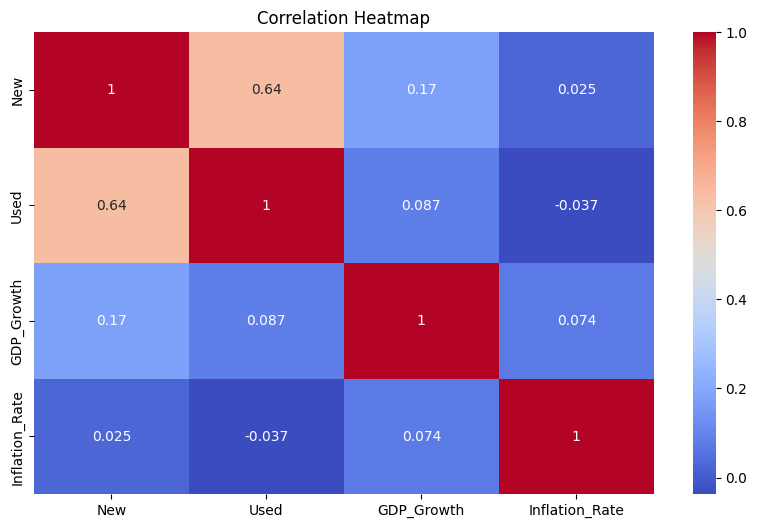

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(enriched_data[['New', 'Used', 'GDP_Growth', 'Inflation_Rate']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [71]:
fig = px.line(
    enriched_data, 
    x='Date', 
    y=['New', 'Used'], 
    title='Time Series Sales Trends',
    markers=True,
    labels={'value': 'Sales Volume', 'variable': 'Category'}
)
fig.update_traces(line_shape='spline')
fig.show()


In [72]:
import plotly.express as px

# Time series visualization for New and Used sales
fig = px.line(
    enriched_data, 
    x='Date', 
    y=['New', 'Used'], 
    title='Hyundai Vehicle Sales Trends (New vs Used)', 
    labels={'value': 'Sales Volume', 'variable': 'Sales Type'}
)
fig.update_traces(line_shape='spline')
fig.show()


In [73]:
fig = px.scatter(
    enriched_data, 
    x='GDP_Growth', 
    y='New', 
    size='Inflation_Rate', 
    color='Used', 
    title='Economic Factors Impact on New Vehicle Sales', 
    labels={'GDP_Growth': 'GDP Growth (%)', 'New': 'New Vehicle Sales'}
)
fig.show()


In [74]:
import plotly.graph_objects as go

# Example data for predictions (replace with your model's output)
forecast_dates = enriched_data['Date'][-12:]  # Last 12 months
actual_sales = enriched_data['New'][-12:]  # Replace with actual values
forecasted_sales = enriched_data['New'][-12:] + 1000  # Replace with predicted values
confidence_upper = forecasted_sales + 500  # Example confidence interval
confidence_lower = forecasted_sales - 500

fig = go.Figure()

# Actual sales
fig.add_trace(go.Scatter(x=forecast_dates, y=actual_sales, mode='lines+markers', name='Actual Sales'))

# Forecasted sales
fig.add_trace(go.Scatter(x=forecast_dates, y=forecasted_sales, mode='lines+markers', name='Forecasted Sales'))

# Confidence interval
fig.add_trace(go.Scatter(
    x=list(forecast_dates) + list(forecast_dates[::-1]),
    y=list(confidence_upper) + list(confidence_lower[::-1]),
    fill='toself',
    fillcolor='rgba(0,100,80,0.2)',
    line_color='rgba(255,255,255,0)',
    name='Confidence Interval'
))

fig.update_layout(title="Hyundai Sales Forecast vs Actual", xaxis_title="Date", yaxis_title="Sales Volume")
fig.show()


In [75]:
# Example adjusted for existing data
fig = px.sunburst(
    enriched_data,
    path=['Year', 'Month'],  # Adjust to hierarchical columns available in your dataset
    values='New',  # Replace with appropriate numeric column
    title='Yearly and Monthly New Sales Contribution'
)
fig.show()


In [76]:
import plotly.figure_factory as ff

# Fix: Compute correlation matrix with actual numeric data columns
correlation_matrix = enriched_data[['New', 'Used', 'GDP_Growth', 'Inflation_Rate']].corr()

# Heatmap visualization
fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.columns.tolist(),
    colorscale='Viridis'
)

fig.update_layout(
    title='Correlation Heatmap',
    xaxis_title='Features',
    yaxis_title='Features'
)

fig.show()


In [77]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['New'], mode='lines', name='New Sales'))
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['Used'], mode='lines', name='Used Sales'))
fig.update_layout(
    title='Hyundai Sales Trends',
    xaxis_title='Date',
    yaxis_title='Sales',
    template='plotly_white'
)
fig.show()


In [78]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(enriched_data['New'], trend='add', seasonal='add', seasonal_periods=12)
forecast = model.fit().forecast(12)

# Plot forecast
fig = go.Figure()
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['New'], mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=pd.date_range(start=enriched_data['Date'].iloc[-1], periods=12, freq='M'), y=forecast, mode='lines', name='Forecast'))
fig.update_layout(title='Sales Forecast', xaxis_title='Date', yaxis_title='Sales', template='plotly_white')
fig.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



In [79]:
enriched_data['ROI'] = (enriched_data['New'] - enriched_data['Used']) / enriched_data['Used'] * 100


In [80]:
# Basic statistics for ROI
print(enriched_data['ROI'].describe())


count    273.000000
mean     -49.218943
std        7.726532
min      -69.406724
25%      -55.043313
50%      -49.898990
75%      -44.504639
max      -28.143106
Name: ROI, dtype: float64


In [81]:
# Find the period with highest and lowest ROI
max_roi = enriched_data.loc[enriched_data['ROI'].idxmax()]
min_roi = enriched_data.loc[enriched_data['ROI'].idxmin()]

print("Highest ROI:")
print(max_roi[['Year', 'Month', 'ROI']])

print("Lowest ROI:")
print(min_roi[['Year', 'Month', 'ROI']])


Highest ROI:
Year          2004
Month          JAN
ROI     -28.143106
Name: 24, dtype: object
Lowest ROI:
Year          2009
Month          FEB
ROI     -69.406724
Name: 85, dtype: object


In [82]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=enriched_data['Date'], y=enriched_data['ROI'], mode='lines+markers', name='ROI'))
fig.update_layout(
    title='ROI Over Time',
    xaxis_title='Date',
    yaxis_title='ROI (%)',
    template='plotly_white'
)
fig.show()


In [83]:
roi_by_year = enriched_data.groupby('Year')['ROI'].mean().reset_index()

fig = go.Figure()
fig.add_trace(go.Bar(x=roi_by_year['Year'], y=roi_by_year['ROI'], name='Average ROI'))
fig.update_layout(
    title='Average ROI by Year',
    xaxis_title='Year',
    yaxis_title='ROI (%)',
    template='plotly_white'
)
fig.show()


In [84]:
correlation_matrix = enriched_data[['ROI', 'GDP_Growth', 'Inflation_Rate']].corr()
print(correlation_matrix)


                     ROI  GDP_Growth  Inflation_Rate
ROI             1.000000    0.155763        0.069586
GDP_Growth      0.155763    1.000000        0.073599
Inflation_Rate  0.069586    0.073599        1.000000


In [85]:
import plotly.figure_factory as ff

fig = ff.create_annotated_heatmap(
    z=correlation_matrix.values,
    x=correlation_matrix.columns.tolist(),
    y=correlation_matrix.columns.tolist(),
    colorscale='Viridis',
    showscale=True
)
fig.update_layout(title='Correlation Matrix of ROI and Economic Indicators')
fig.show()


In [86]:
def categorize_roi(value):
    if value < 0:
        return 'Negative'
    elif value < 10:
        return 'Low'
    elif value < 20:
        return 'Medium'
    else:
        return 'High'

enriched_data['ROI_Category'] = enriched_data['ROI'].apply(categorize_roi)

# Check the distribution of ROI categories
print(enriched_data['ROI_Category'].value_counts())


ROI_Category
Negative    273
Name: count, dtype: int64


In [87]:
fig = go.Figure()
fig.add_trace(go.Pie(labels=enriched_data['ROI_Category'].value_counts().index,
                     values=enriched_data['ROI_Category'].value_counts().values))
fig.update_layout(title='Distribution of ROI Categories')
fig.show()


## Sales Trends Analysis
This interactive dashboard showcases Hyundai's sales trends, highlighting monthly and yearly patterns. The visualizations aim to assist Hyundai in identifying high-growth regions and optimizing their sales strategy.
